In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-placement-dataset/Job_Placement_Data.csv


In [5]:
main_data= pd.read_csv('/kaggle/input/job-placement-dataset/Job_Placement_Data.csv')
main_data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
main_data.shape

(215, 13)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
main_data.drop_duplicates()
main_data.shape

(215, 13)

<AxesSubplot:xlabel='status'>

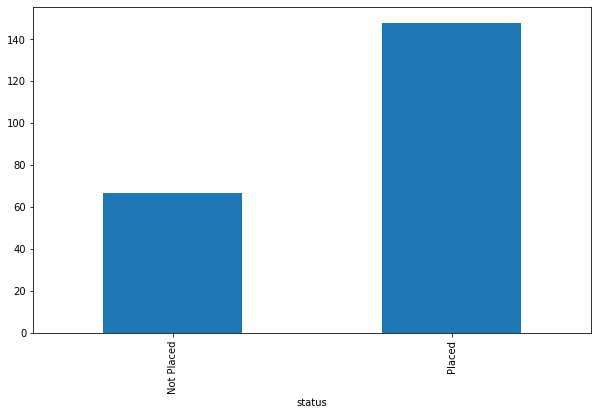

In [9]:
%matplotlib inline

target_data = main_data.groupby('status').size()
target_data.plot(kind= 'bar',figsize = (10,6))

In [10]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [11]:
main_data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [12]:
main_data.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

In [13]:
CategoricalVariable = ('gender', 'ssc_board', 'hsc_board','hsc_subject',
                       'undergrad_degree' ,'work_experience'  ,'specialisation')            
ContinuousVariable =('ssc_percentage ','hsc_percentage','degree_percentage',
                     'emp_test_percentage', 'mba_percent')

array([[<AxesSubplot:title={'center':'hsc_percentage'}>,
        <AxesSubplot:title={'center':'degree_percentage'}>],
       [<AxesSubplot:title={'center':'ssc_percentage'}>,
        <AxesSubplot:title={'center':'mba_percent'}>],
       [<AxesSubplot:title={'center':'emp_test_percentage'}>,
        <AxesSubplot:>]], dtype=object)

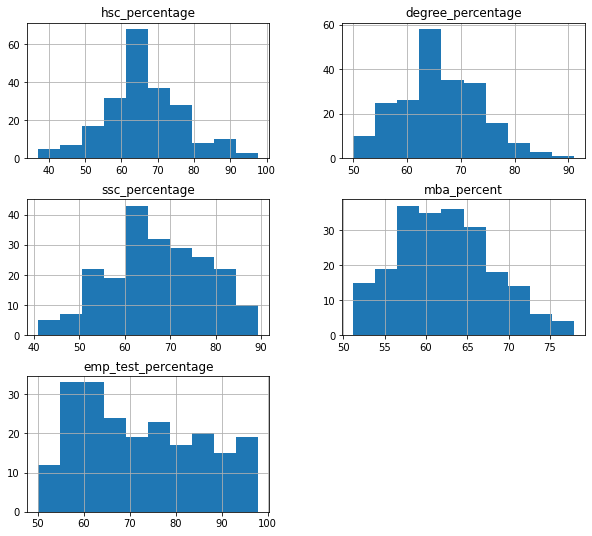

In [14]:
main_data.hist(['hsc_percentage','degree_percentage','ssc_percentage','mba_percent',
                     'emp_test_percentage'],figsize= (10,9))

In [15]:
def colsToPlot (inpData, CategoricalData):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subplot = plt.subplots(nrows = 1, ncols = len(CategoricalData), figsize= (17,5))
    fig.suptitle('bar charts of'+ str( CategoricalData))
    
    
    for cols, i in zip( CategoricalData, range(len( CategoricalData))):
        inpData.groupby(cols).size().plot(kind ='bar',ax = subplot[i])

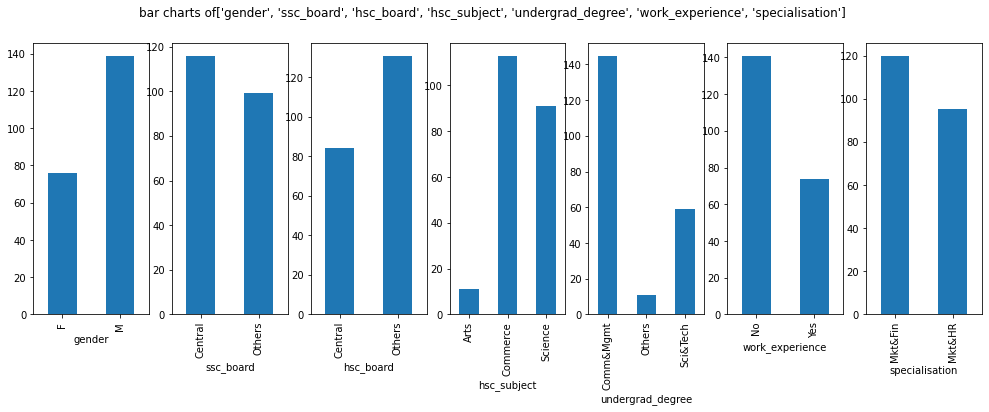

In [16]:
colsToPlot(inpData= main_data,CategoricalData= ['gender', 'ssc_board', 'hsc_board','hsc_subject',
                       'undergrad_degree' ,'work_experience'  ,'specialisation'])

In [17]:
main_data.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [18]:
def FunAnova(inpData, Target, Conti):
    from scipy.stats import f_oneway
    
    SelectedPrid =[]
    
    for predictor in Conti:
        Catego = inpData.groupby(Target)[predictor].apply(list)
        AnovaResults = f_oneway(*Catego)
    
    
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', Target, '| P-Value:', AnovaResults)
            SelectedPrid.append(predictor)
        else:
            print(predictor, 'is not correlated with', Target, '| P-Value:', AnovaResults)
   

    return(SelectedPrid)
    
    
    

In [19]:
Continuous = ['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage', 'mba_percent']
                                                         
FunAnova(inpData = main_data, Target= 'status',  Conti= Continuous)



ssc_percentage is correlated with status | P-Value: F_onewayResult(statistic=124.84250634372715, pvalue=4.115201043884882e-23)
hsc_percentage is correlated with status | P-Value: F_onewayResult(statistic=67.74518757489524, pvalue=1.8492127569315302e-14)
degree_percentage is correlated with status | P-Value: F_onewayResult(statistic=63.71917613798709, pvalue=8.807682138862259e-14)
emp_test_percentage is not correlated with status | P-Value: F_onewayResult(statistic=3.5276269558503235, pvalue=0.061720381110172244)
mba_percent is not correlated with status | P-Value: F_onewayResult(statistic=1.2678097942396966, pvalue=0.2614450019774897)


['ssc_percentage', 'hsc_percentage', 'degree_percentage']

In [20]:
def FunChi(inpData, Target, Categorical):
    from scipy.stats import chi2_contingency
    
    SelectedPrid =[]
    
    for predictor in Categorical:
        Categ = pd.crosstab(index = inpData[Target], columns=inpData[predictor])
        ChiResults = chi2_contingency(Categ)
    
    
        if (ChiResults[1] < 0.05):
            print(predictor, 'is correlated with', Target, '| P-Value:', ChiResults)
            SelectedPrid.append(predictor)
        else:
            print(predictor, 'is not correlated with', Target, '| P-Value:', ChiResults)
   

    return(SelectedPrid)

In [21]:
Catelist = ['gender', 'ssc_board', 'hsc_board','hsc_subject',
                       'undergrad_degree' ,'work_experience'  ,'specialisation']
                                                         
FunChi(inpData = main_data, Target= 'status',  Categorical= Catelist)


gender is not correlated with status | P-Value: (1.3817539668505106, 0.23980260881037568, 1, array([[23.68372093, 43.31627907],
       [52.31627907, 95.68372093]]))
ssc_board is not correlated with status | P-Value: (0.15933127499487468, 0.6897729431530739, 1, array([[36.14883721, 30.85116279],
       [79.85116279, 68.14883721]]))
hsc_board is not correlated with status | P-Value: (0.009517458006762429, 0.9222837052885, 1, array([[26.17674419, 40.82325581],
       [57.82325581, 90.17674419]]))
hsc_subject is not correlated with status | P-Value: (1.1147451327084137, 0.5727118511343621, 2, array([[ 3.42790698, 35.21395349, 28.35813953],
       [ 7.57209302, 77.78604651, 62.64186047]]))
undergrad_degree is not correlated with status | P-Value: (2.9690428771222925, 0.22661076190356658, 2, array([[45.18604651,  3.42790698, 18.38604651],
       [99.81395349,  7.57209302, 40.61395349]]))
work_experience is correlated with status | P-Value: (15.154425347637423, 9.906584720516494e-05, 1, array

['work_experience', 'specialisation']

In [22]:
Final_column= ['ssc_percentage', 'hsc_percentage', 'degree_percentage',
             'work_experience', 'specialisation','status']
Final_data= main_data[Final_column]
Final_data.head()

,ssc_percentage,hsc_percentage,degree_percentage,work_experience,specialisation,status
0,67.00,91.00,58.00,No,Mkt&HR,Placed
1,79.33,78.33,77.48,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,No,Mkt&Fin,Placed


In [23]:
Final_data['specialisation']

0       Mkt&HR
1      Mkt&Fin
2      Mkt&Fin
3       Mkt&HR
4      Mkt&Fin
        ...   
210    Mkt&Fin
211    Mkt&Fin
212    Mkt&Fin
213     Mkt&HR
214     Mkt&HR
Name: specialisation, Length: 215, dtype: object

In [24]:
Final_data['work_experience'].replace({'Yes':1, 'No':0}, inplace=True)
Final_data['specialisation'].replace({' Mkt&HR':1, ' Mkt&Fin':0}, inplace=True)
Final_data.head()

,ssc_percentage,hsc_percentage,degree_percentage,work_experience,specialisation,status
0,67.00,91.00,58.00,0,Mkt&HR,Placed
1,79.33,78.33,77.48,1,Mkt&Fin,Placed
2,65.00,68.00,64.00,0,Mkt&Fin,Placed
3,56.00,52.00,52.00,0,Mkt&HR,Not Placed
4,85.80,73.60,73.30,0,Mkt&Fin,Placed


In [25]:
#Final_data['specialisation'].replace({' Mkt&HR':1, ' Mkt&Fin':2}, inplace=True)
#Final_data
Final_data = pd.get_dummies(Final_data, columns=['specialisation'])
Final_data

,ssc_percentage,hsc_percentage,degree_percentage,work_experience,status,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,0,Placed,0,1
1,79.33,78.33,77.48,1,Placed,1,0
2,65.00,68.00,64.00,0,Placed,1,0
3,56.00,52.00,52.00,0,Not Placed,0,1
4,85.80,73.60,73.30,0,Placed,1,0
...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,Placed,1,0
211,58.00,60.00,72.00,0,Placed,1,0
212,67.00,67.00,73.00,1,Placed,1,0
213,74.00,66.00,58.00,0,Placed,0,1


In [26]:
Final_data.shape

(215, 7)

In [27]:
Predictors = ['ssc_percentage', 'hsc_percentage', 'degree_percentage',
             'work_experience', 'specialisation_Mkt&Fin','specialisation_Mkt&HR']
TargetVariable ='status'
X = Final_data[Predictors].values
y= Final_data [TargetVariable].values
y.shape

(215,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
X_train , X_test , y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 2)

In [29]:
X_test.shape 

(43, 6)

In [30]:
y_test.shape

(43,)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.813953488372093

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 7,  6],
       [ 2, 28]])

In [38]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)



0.9069767441860465

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  3],
       [ 1, 29]])

In [40]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

model= tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[ 9,  4],
       [ 6, 24]])

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
    
model= tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[ 9,  4],
       [ 5, 25]])